# Exercise 1: Understanding the Basics

**Time: 15 Minutes**

# https://gisinc.dev.geocloud.com/portal

### 1. Login to ArcGIS Enterprise using named user accounts. Display your Account in the Jupyter Notebook cell.

- Create a profile name.  This will be used for all other exercises.

In [3]:
from arcgis.gis import GIS

In [ ]:
# Insert Code here - remove the `None` and fill in your code.
gis = GIS(url="https://gisinc.dev.geocloud.com/portal", username='andrew', profile='ex1')

#### Solution

In [3]:
# %load ./answer/q1.py
from arcgis.gis import GIS
gis = GIS(profile="class_profile")
gis.users.me


<User username:andrew>

### 2. Do the following:

    - Login to ArcGIS Online (AGOL) anonymously.
    - Find the following Hosted Feature Layer items and append them to the list with the variable name `items`.
        + USA States (Generalized) and owned by `esri_dm`
        + USA Rivers and Streams and owned by `esri`
        + USA Major Cities and owned by `esri_dm`

In [4]:
# do not modify, but run
items = []
gis = GIS()

In [ ]:
# INSERT ANSWER HERE

#### Solution

In [6]:
# %load ./answer/q2.py
# Find the States Layer
results = [item for item in \
         gis.content.search("""generalized and states and USA AND owner:esri_dm""", item_type="Feature Layer", max_items=5) \
         if item.title == "USA States (Generalized)"]
states = results[0]
items.append(states)
# Find the Rivers and Streams
results = gis.content.search("""title:'USA Rivers and Streams' AND owner:esri""", item_type="Feature Layer", max_items=5)
results = [item for item in results if item.title == 'USA Rivers and Streams']
items += results
# Find the Cities
results = gis.content.search("""USA Major Cities AND owner:esri_dm""", item_type="Feature Layer", max_items=5)
items += results
items


[<Item title:"USA States (Generalized)" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Rivers and Streams" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>]

### 3. Using the Results from Question 2, Plot the data to the map.  

- After adding the layers, show the legend on the map
- Advanced Question: How can you override the symbology?

In [8]:
# DO NOT MODIFY THIS CELL
m = gis.map('Omaha, NB')
m.zoom = 8

In [ ]:
# INSERT CODE HERE

In [9]:
# RUN AFTER LOADING THE DATA
m

MapView(layout=Layout(height='400px', width='100%'), zoom=8.0)

#### Solution

In [10]:
# %load ./answer/q3.py
for i in items:
    print(i.title)
    m.add_layer(i)
m.legend = True

USA States (Generalized)
USA Rivers and Streams
USA Major Cities


In [12]:
# %load ./answer/q3b.py
m.add_layer(items[0], {
        "renderer":"ClassedColorRenderer",
        "field_name":"VACANT",
        "opacity":0.7})

4. Create a group with the following:
    - Title: first_group_ Your_Last_Name
    - Description: Provide a description of your group
    - Define the thumbnail
    - Tags: First, Group

In [13]:
# DO NOT MODIFY
import uuid

In [16]:
# Modify the title variable with your last name
thumbnail = r"./data/batman.png"
lname = None
title = "first_group_{lname}".format(lname=None or uuid.uuid4().hex[:5])

In [ ]:
# INSERT CODE HERE

<Group title:"first_group_c41d8" owner:andrew>
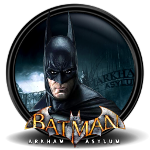

In [20]:
# %load ./answer/q4.py
gis = GIS(profile="class_profile")
group = gis.groups.create(description="Descriptive Text", access="public", 
                          auto_join=False, is_invitation_only=True, 
                          tags="First, Group", title=title,
                          thumbnail=thumbnail
                         )
group

5. Create a user with the following:


    1. First name, last name, username, password.
    2. Provide the user type of `creatorUT` (creator)
    3. Role should be `org_publisher`
    

In [ ]:
# ENTER IN CREDENTIALS (provided by the instructor)
#
from arcgis.gis import GIS
url = None
username = ""
password = ""
gis = GIS(url=url, username=username, password=password)

In [ ]:
# ENTER ANSWER HERE!

**solution**

In [ ]:
# %load ./answer/q5.py
u = gis.users.create(username="A" + uuid.uuid4().hex[:5], 
                     password="Am4ziNgPassw0Rd", 
                     firstname="FIRSTNAME", 
                     lastname="LASTNAME",
                     email="fakeemail@esri.com", 
                     role="org_publisher", 
                     user_type="creatorUT")